In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime as dt

In [27]:
mental = pd.read_csv('Resources/mental.csv')
vaccine = pd.read_csv('Resources/vaccine_trimmed.csv')

In [28]:
mental

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,31.9,27.4,36.7,27.4 - 36.7,30.4-33.1
10697,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,28.5,25.2,32.0,25.2 - 32.0,25.5-30.3
10698,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,37.5,30.8,44.6,30.8 - 44.6,37.1-43.5
10699,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,27.6,22.7,32.8,22.7 - 32.8,25.5-30.3


In [29]:
vaccine = vaccine.drop(columns =['Unnamed: 0'])
vaccine

,Date,Recip_State,Recip_County,Completeness_pct
0,07/27/2022,AR,Randolph County,90.5
1,07/27/2022,IA,Wright County,97.4
2,07/27/2022,NC,Bladen County,96.9
3,07/27/2022,RI,Bristol County,88.6
4,07/27/2022,MS,Harrison County,98.1
...,...,...,...,...
1828171,12/13/2020,FL,Wakulla County,0.0
1828172,12/13/2020,AR,Ouachita County,0.0
1828173,12/13/2020,SD,Bennett County,0.0
1828174,12/13/2020,KY,Butler County,0.0


In [57]:
mental_trimmed = mental.loc[(mental['Group'] == 'By Age') | (mental['Group'] == 'By State')].reset_index(drop=True)
mental_trimmed = mental_trimmed.loc[mental_trimmed['Indicator'] == "Symptoms of Anxiety Disorder or Depressive Disorder"]

In [58]:
mental_trimmed

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
116,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,46.8,44.3,49.3,44.3 - 49.3,NaN
117,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,39.6,37.7,41.5,37.7 - 41.5,NaN
118,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,38.9,37.2,40.7,37.2 - 40.7,NaN
119,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,35.8,34.0,37.7,34.0 - 37.7,NaN
120,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,28.9,27.6,30.3,27.6 - 30.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8320,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,31.9,27.4,36.7,27.4 - 36.7,30.4-33.1
8321,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,28.5,25.2,32.0,25.2 - 32.0,25.5-30.3
8322,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,37.5,30.8,44.6,30.8 - 44.6,37.1-43.5
8323,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3.5,47,"Jun 29 - Jul 11, 2022",06/29/2022,07/11/2022,27.6,22.7,32.8,22.7 - 32.8,25.5-30.3


In [32]:
#vaccine = vaccine.drop(columns=['Unnamed: 0'])
vaccine
vax_by_state = vaccine.loc[vaccine['Recip_State'] == 'AR']
vax_by_state

,Date,Recip_State,Recip_County,Completeness_pct
0,07/27/2022,AR,Randolph County,90.5
17,07/27/2022,AR,Crittenden County,90.5
80,07/27/2022,AR,Clay County,90.5
115,07/27/2022,AR,Lafayette County,90.5
122,07/27/2022,AR,Miller County,90.5
...,...,...,...,...
1828017,12/13/2020,AR,Johnson County,0.0
1828038,12/13/2020,AR,Clark County,0.0
1828065,12/13/2020,AR,Crittenden County,0.0
1828145,12/13/2020,AR,Pike County,0.0


In [33]:
end = mental['Time Period End Date'].unique().tolist()
new_end = end[0:-1]
newer_end = new_end[21:]
newer_end

['12/21/2020',
 '01/05/2021',
 '01/18/2021',
 '02/01/2021',
 '02/15/2021',
 '03/01/2021',
 '03/15/2021',
 '03/29/2021',
 '04/13/2021',
 '04/26/2021',
 '05/10/2021',
 '05/24/2021',
 '06/07/2021',
 '06/21/2021',
 '07/05/2021',
 '07/20/2021',
 '08/02/2021',
 '08/16/2021',
 '08/30/2021',
 '09/13/2021',
 '09/27/2021',
 '10/11/2021',
 '11/30/2021',
 '12/13/2021',
 '01/10/2022',
 '02/07/2022',
 '03/01/2022',
 '03/14/2022',
 '04/11/2022',
 '05/09/2022',
 '05/31/2022',
 '06/13/2022']

In [59]:
state_2 = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

state_2 = {state: abbrev for state, abbrev in state_2.items()}
new_mental = mental_trimmed.loc[mental_trimmed['Group'] == 'By State']
new_mental = new_mental.rename(columns={'Time Period End Date': 'Date'})
new_mental = new_mental[['State', 'Value', 'Date']]
new_mental['abbrev'] = new_mental['State'].map(state_2)
new_mental = new_mental.drop(columns=['State'])
new_mental = new_mental.rename(columns={'abbrev':"State"})
new_mental

,Value,Date,State
123,30.3,05/05/2020,AL
124,31.5,05/05/2020,AK
125,36.4,05/05/2020,AZ
126,38.0,05/05/2020,AR
127,37.4,05/05/2020,CA
...,...,...,...
8320,31.9,07/11/2022,VA
8321,28.5,07/11/2022,WA
8322,37.5,07/11/2022,WV
8323,27.6,07/11/2022,WI


In [60]:
test_df = vaccine
test_df = test_df.rename(columns={'Recip_State': 'State'})
new_vax = pd.DataFrame()
mental_dates = pd.DataFrame()
for column in test_df.columns:
    new_vax[column] = ''
for column in new_mental.columns:
    mental_dates[column] = ''
for date in newer_end:
    df = new_mental.loc[new_mental['Date'] == date]
    df_2 = test_df.loc[test_df['Date'] == date]
    mental_dates = pd.concat([mental_dates, df])
    new_vax = pd.concat([new_vax, df_2])

In [80]:
trim_vax = pd.DataFrame()
state_list = test_df['State'].unique().tolist()
new_state_list = state_list[0:-2]
for column in new_vax.columns:
    trim_vax[column] = ''
for date in newer_end:
    date_trim = new_vax.loc[new_vax['Date'] == date]
    for state in new_state_list:
        state_trim = date_trim.loc[date_trim['State'] == state]
        complete_trim = state_trim.iloc[2:3,:]
        #print(complete_trim)
        trim_vax = pd.concat([trim_vax, complete_trim])
trim_vax = trim_vax.dropna()
trim_vax = trim_vax.drop(columns=['Recip_County']).reset_index(drop=True)
trim_vax['Date'] = pd.to_datetime(trim_vax['Date'])
trim_vax['Date'] = trim_vax['Date'].dt.strftime("%Y/%m/%d")
trim_vax = trim_vax.sort_values(by=['Date','State'])
trim_vax = trim_vax.astype({'Date': str})
trim_vax = trim_vax.reset_index(drop=True)

In [98]:
trim_test = trim_vax.loc[(trim_vax['State'] != 'PR') & (trim_vax['State'] != 'VI')]
trim_test

,Date,State,Completeness_pct
0,2020/12/21,AK,0.0
1,2020/12/21,AL,0.0
2,2020/12/21,AR,0.0
3,2020/12/21,AZ,0.0
4,2020/12/21,CA,0.0
...,...,...,...
1655,2022/06/13,VT,73.5
1656,2022/06/13,WA,96.0
1657,2022/06/13,WI,96.8
1658,2022/06/13,WV,97.2


In [63]:
mental_dates = mental_dates.reset_index(drop=True)
mental_dates

,Value,Date,State
0,44.0,12/21/2020,AL
1,44.1,12/21/2020,AK
2,43.5,12/21/2020,AZ
3,43.0,12/21/2020,AR
4,45.0,12/21/2020,CA
...,...,...,...
1321,29.6,06/13/2022,VA
1322,30.7,06/13/2022,WA
1323,40.2,06/13/2022,WV
1324,30.8,06/13/2022,WI


In [114]:
date_trim = mental_dates.loc[mental_dates['State'] != 'DC']
date_trim['Date'] = pd.to_datetime(mental_dates['Date'])
date_trim['Date'] = date_trim['Date'].dt.strftime("%Y/%m/%d")
date_trim = date_trim.sort_values(by=['Date','State'])
date_trim = date_trim.astype({'Date': str})
date_trim = date_trim.reset_index(drop=True)
date_trim

C:\Users\rcrch\AppData\Local\Temp\ipykernel_26424\4285255871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_trim['Date'] = pd.to_datetime(mental_dates['Date'])
C:\Users\rcrch\AppData\Local\Temp\ipykernel_26424\4285255871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_trim['Date'] = date_trim['Date'].dt.strftime("%Y/%m/%d")


,Value,Date,State
0,44.1,2020/12/21,AK
1,44.0,2020/12/21,AL
2,43.0,2020/12/21,AR
3,43.5,2020/12/21,AZ
4,45.0,2020/12/21,CA
...,...,...,...
1295,29.2,2022/06/13,VT
1296,30.7,2022/06/13,WA
1297,30.8,2022/06/13,WI
1298,40.2,2022/06/13,WV


In [145]:
trim_test_2.to_csv('vaccine_data_df.csv', encoding='utf-8')
date_trim.to_csv('mental_health_data_df.csv', encoding='utf-8')

In [224]:
vaccine_df = pd.read_csv('vaccine_data_df.csv')
vaccine_df = vaccine_df.drop(columns=['Unnamed: 0'])
vaccine_df = vaccine_df.dropna().reset_index(drop=True)
mental_health_df = pd.read_csv('mental_health_data_df.csv')
mental_health_df = mental_health_df.drop(columns=['Unnamed: 0'])
mental_health_df = mental_health_df.dropna().reset_index(drop=True)
mental_health_df = mental_health_df.drop([1160,1210,1260])
mental_health_df = mental_health_df.reset_index(drop=True)
value = mental_health_df['Value']
vaccine_df['Value'] = value
vaccine_df

,Date,State,Completeness_pct,Value
0,2020/12/21,AK,0.0,44.1
1,2020/12/21,AL,0.0,44.0
2,2020/12/21,AR,0.0,43.0
3,2020/12/21,AZ,0.0,43.5
4,2020/12/21,CA,0.0,45.0
...,...,...,...,...
1292,2022/06/13,VT,73.5,29.2
1293,2022/06/13,WA,96.0,30.7
1294,2022/06/13,WI,96.8,30.8
1295,2022/06/13,WV,97.2,40.2


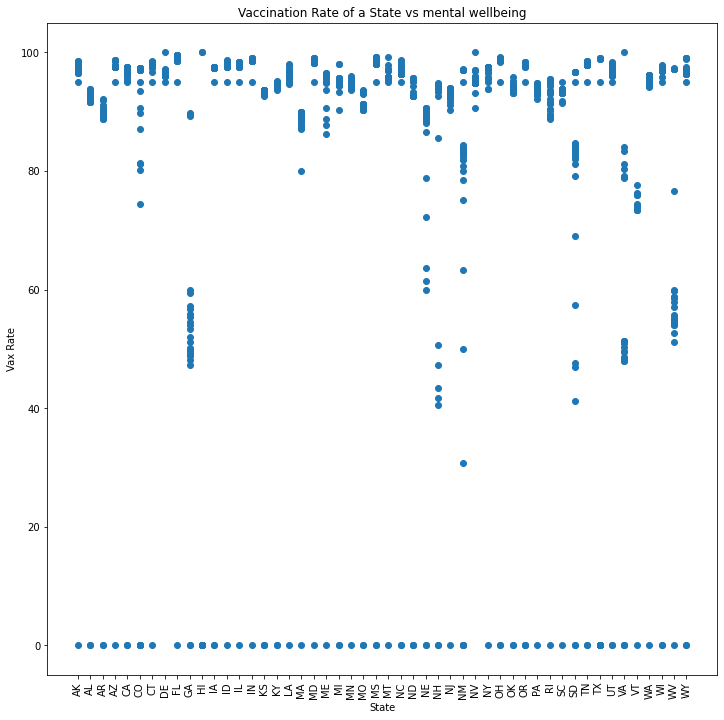

In [233]:
plt.figure(figsize=[12,12])
plt.scatter(vaccine_df['State'], vaccine_df['Completeness_pct'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Vax Rate')
plt.title('Vaccination Rate of a State vs mental wellbeing')
plt.show()

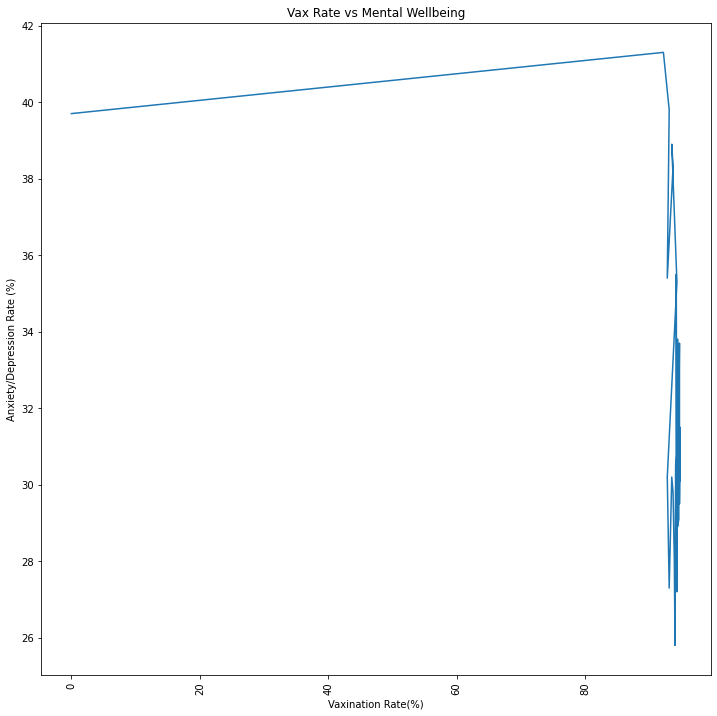

In [235]:
pa_df = vaccine_df.loc[vaccine_df['State'] =='PA']
plt.figure(figsize=[12,12])
plt.plot(pa_df['Completeness_pct'], pa_df['Value'])
plt.title('Vax Rate vs Mental Wellbeing')
plt.xlabel('Vaxination Rate(%)')
plt.ylabel('Anxiety/Depression Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [268]:
def vax_plot(state, x):
    state_df = vaccine_df.loc[vaccine_df['State'] == state]
    ax[x].plot(state_df['Completeness_pct'], state_df['Value'])
    ax[x].set_title(f'Vax Rate vs Mental Wellbeing in {state}')
    ax[x].set_xlabel('Vaxination Rate (%)')
    ax[x].set_ylabel('Anxiety/Depression Rate (%)')

<Figure size 144000x144000 with 0 Axes>

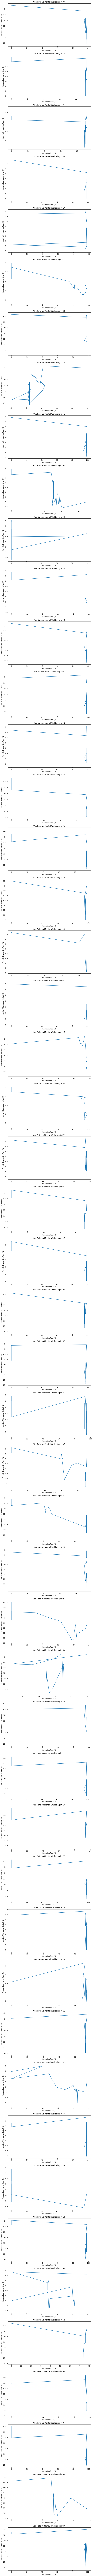

In [294]:
state_list = vaccine_df['State'].unique().tolist()
plt.figure(figsize=[2000,2000])
fig, ax = plt.subplots(50, figsize=(10,300))
plt.subplots_adjust(left=0.125, right=0.9,bottom=0.1,top=0.9,wspace=0.2, hspace = 0.2)
#fig.tight_layout()
x_axis = 0
for state in state_list:
    vax_plot(state, x_axis)
    x_axis += 1
plt.savefig('Vax_rate_by_state.png')
plt.show()


[]

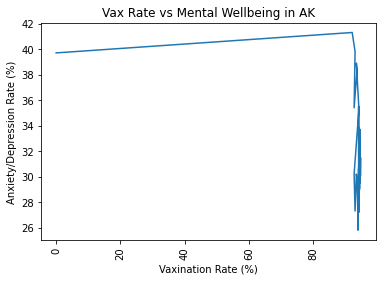

In [239]:
fig, ax = plt.subplots(1,1)
vax_plot(state_list[0])
plt.plot()

In [295]:
vaccine_df.to_csv('final.csv')